In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
from skimage.transform import resize
%matplotlib inline

In [2]:
# Activer la complétion automatique avec Tab
%config Completer.use_jedi = False

# FIRST

In [6]:
x_train = pd.read_csv("../data/x_train_update.csv", index_col=0)
x_train.head(5)

,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


In [8]:
y_train = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col=0)
y_train.head(5)

,prdtypecode
0,10
1,2280
2,50
3,1280
4,2705


In [4]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ MB


In [5]:
# Reconstruire la colonne image_path avec le bon format
x_train["image_path"] = "../data/images/images/image_train/" + \
                        "image_" + x_train["imageid"].astype(str) + "_product_" + \
                        x_train["productid"].astype(str) + ".jpg"

In [ ]:
from matplotlib.image import imread

#  vérifier les dimensions des images
img_size = []
for img_path in x_train["image_path"]:
    img = imread(img_path)
    img_size.append(img.shape)

#print(img_size[0])  # Afficher les dimensions des images

In [7]:
#Vérifier la taille des images
img_size = np.stack(img_size, axis=0)  # Regrouper les tailles
unique_sizes = pd.DataFrame(img_size).value_counts(normalize=True)
print(unique_sizes)

0    1    2
500  500  3    1.0
Name: proportion, dtype: float64


In [ ]:
from skimage.transform import resize

# Liste pour stocker les images redimensionnées
images_resized = []

# Taille cible
target_size = (128, 128)  # Redimensionnement à 128x128 pixels

# Redimensionner chaque image
for img_path in x_train["image_path"]:
    img = imread(img_path)  # Charger l'image
    img_resized = resize(img, target_size, anti_aliasing=True)  # Redimensionner
    img_resized = img_resized * 255  # Remettre les valeurs à l'échelle 0-255 si nécessaire
    images_resized.append(img_resized.astype(np.uint8))  # Convertir en entier (0-255)

# Conversion en tableau numpy pour traitement ultérieur
images_resized = np.array(images_resized)

In [39]:
print(images_resized.shape)  # Devrait afficher (nombre_d'images, 128, 128, 3)

(84916, 128, 128, 3)


# SAVE resize 128 / 128 pixels

In [41]:
# Sauvegarder x_train avec les chemins d'images
x_train.to_pickle("../data/x_train_with_image_paths.pkl")

# Sauvegarder les dimensions des images
np.save("../data/image_sizes.npy", img_size)

# Sauvegarder les images resize
np.save("../data/images_resized.npy", images_resized)

# LOAD resize 128 / 128 pixels

In [5]:
# Charger le DataFrame sauvegardé
x_train = pd.read_pickle("../data/x_train_with_image_paths.pkl")

# Charger les dimensions des images
img_size = np.load("../data/image_sizes.npy")

# Charger les images resize
loaded_images = np.load("../data/images_resized.npy")
print(loaded_images.shape)

(84916, 128, 128, 3)


In [6]:
x_train.head(2)

,designation,description,productid,imageid,image_path
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,../data/images/images/image_train/image_126359...
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,../data/images/images/image_train/image_100814...


### Continue

In [11]:
img_size

array([[500, 500,   3],
       [500, 500,   3],
       [500, 500,   3],
       ...,
       [500, 500,   3],
       [500, 500,   3],
       [500, 500,   3]])

In [13]:
# Normalisation des valeurs des pixels entre 0 et 1
images_normalized = loaded_images / 255.0

# Vérifier les valeurs après normalisation
print(images_normalized.min(), images_normalized.max())  # Doit afficher 0.0 et 1.0

0.0 1.0


In [14]:
from skimage.color import rgb2gray
import numpy as np

# Conversion des images normalisées en niveaux de gris
images_gray = np.array([rgb2gray(img) for img in images_normalized])

# Vérification de la forme et des valeurs
print(images_gray.shape)  # Devrait être (nombre_d'images, 128, 128)
print(images_gray.min(), images_gray.max())  # Doit afficher des valeurs entre 0.0 et 1.0


(84916, 128, 128)
0.0 1.0


In [15]:
# Assurez-vous que img_size est un DataFrame avec les bons indices
img_size_df = pd.DataFrame(img_size, columns=[0, 1, 2], index=x_train.index)
img_size_df = img_size_df.rename(columns={0: "height", 1: "width", 2: "channels"})
img_size_df.head(5)

,height,width,channels
0,500,500,3
1,500,500,3
2,500,500,3
3,500,500,3
4,500,500,3


# SAVE Normaliser / Niveaux de gris

In [61]:
np.save("../data/images_gray.npy", images_gray)

In [23]:
import os
from PIL import Image

# Répertoire pour sauvegarder les images en niveaux de gris
gray_images_dir = "../data/images_gray"
os.makedirs(gray_images_dir, exist_ok=True)

# Sauvegarder chaque image en niveaux de gris
for i, img in enumerate(images_gray):
    img_path = os.path.join(gray_images_dir, f"gray_image_{i}.png")
    img = (img * 255).astype(np.uint8)  # Convertir les valeurs entre 0 et 255
    Image.fromarray(img).save(img_path)

In [27]:
x_train

,designation,description,productid,imageid,image_path,images_gray_path
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,../data/images/images/image_train/image_126359...,../data/images_gray\gray_image_0.png
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,../data/images/images/image_train/image_100814...,../data/images_gray\gray_image_1.png
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,../data/images/images/image_train/image_938777...,../data/images_gray\gray_image_2.png
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,../data/images/images/image_train/image_457047...,../data/images_gray\gray_image_3.png
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,../data/images/images/image_train/image_107775...,../data/images_gray\gray_image_4.png
...,...,...,...,...,...,...
84911,The Sims [ Import Anglais ],NaN,206719094,941495734,../data/images/images/image_train/image_941495...,../data/images_gray\gray_image_84911.png
84912,Kit piscine acier NEVADA déco pierre Ø 3.50m x...,<b>Description complète :</b><br />Kit piscine...,3065095706,1188462883,../data/images/images/image_train/image_118846...,../data/images_gray\gray_image_84912.png
84913,Journal Officiel De La Republique Francaise N°...,NaN,440707564,1009325617,../data/images/images/image_train/image_100932...,../data/images_gray\gray_image_84913.png
84914,Table Basse Bois De Récupération Massif Base B...,<p>Cette table basse a un design unique et con...,3942400296,1267353403,../data/images/images/image_train/image_126735...,../data/images_gray\gray_image_84914.png


# LOAD Normaliser / Niveaux de gris

In [9]:
images_gray = np.load("../data/images_gray.npy")

### Continue

In [11]:
gray_images_dir = "../data/images_gray"
# Ajouter une colonne avec les chemins des images en niveaux de gris
x_train["images_gray_path"] = [
    os.path.join(gray_images_dir, f"gray_image_{i}.png") for i in range(len(x_train))
]

# Vérifier le DataFrame
x_train.head(1)


,designation,description,productid,imageid,image_path,images_gray_path
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,../data/images/images/image_train/image_126359...,../data/images_gray\gray_image_0.png


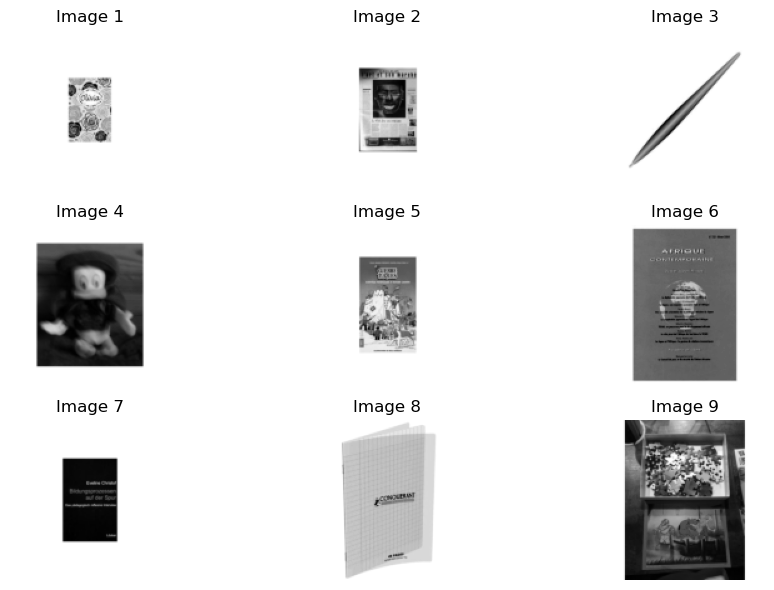

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(10, 6))  # Crée une grille 2x3
axes = axes.ravel()  # Aplatit la grille pour un accès facile aux axes

for i in range(9):  # Afficher les 6 premières images
    axes[i].imshow(images_gray[i], cmap='gray')
    axes[i].set_title(f"Image {i+1}")
    axes[i].axis('off')  # Supprimer les axes

plt.tight_layout()  # Ajuster les marges
plt.show()

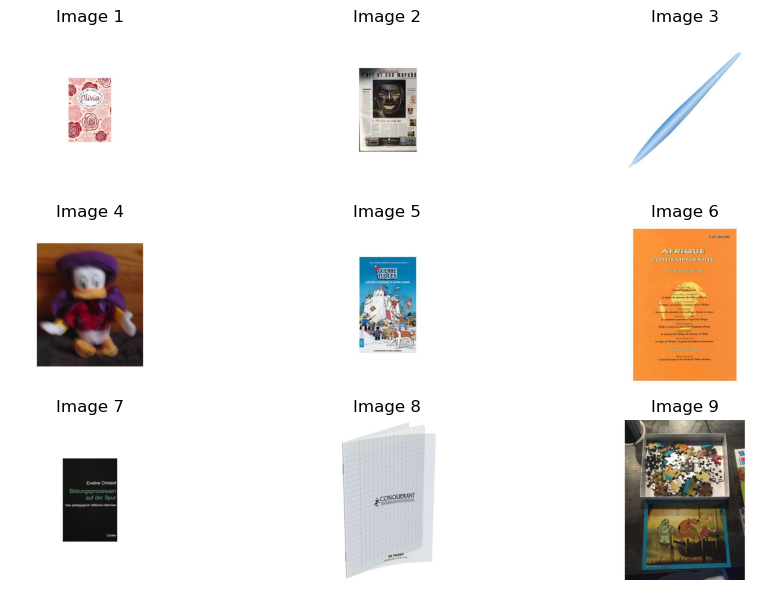

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(10, 6))  # Crée une grille 2x3
axes = axes.ravel()  # Aplatit la grille pour un accès facile aux axes

for i in range(9):  # Afficher les 9 premières images
    img_path = x_train.iloc[i]["image_path"]  # Récupérer le chemin de l'image
    img = imread(img_path)  # Charger l'image depuis le chemin
    axes[i].imshow(img)  # Afficher l'image
    axes[i].set_title(f"Image {i+1}")  # Ajouter un titre
    axes[i].axis('off')  # Supprimer les axes

plt.tight_layout()  # Ajuster les marges
plt.show()


In [14]:
'''# Merge des dimensions avec x_train en utilisant les indices
x_train = pd.concat([x_train, img_size_df], axis=1)

# Vérifiez le résultat
print(x_train.shape)
x_train.head()'''

'# Merge des dimensions avec x_train en utilisant les indices\nx_train = pd.concat([x_train, img_size_df], axis=1)\n\n# Vérifiez le résultat\nprint(x_train.shape)\nx_train.head()'

In [15]:
x_train.head(2)

,designation,description,productid,imageid,image_path,images_gray_path
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,../data/images/images/image_train/image_126359...,../data/images_gray\gray_image_0.png
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,../data/images/images/image_train/image_100814...,../data/images_gray\gray_image_1.png
